<a href="https://colab.research.google.com/github/Akhter04/Customer-Conversion-Prediction/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Conversion Prediction**

### **Problem Statement**
You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 

### By the problem statement we get that in this Customer Conversion Prediction project, machine learning models are used to predict whether a client will subscribe to an insurance policy. The project aims to help the insurance company identify the customers most likely to convert.

By reading the below data we get to know that:
*   It is a supervised learning problem - We are predicting target variable
*   From target varible we can clearly understand it is a classification problem
*   From target variable we can tell it is a binary classification problem.   target = (y/n)

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# loading the dataset
df=pd.read_csv("train.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


Supervised Lerning Dataset. 
Target Variable(y) is binary categorical



In [3]:
df.shape

(45211, 11)

# **Data Preprocessing**
# **Data Cleaning**

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset to improve its quality and ensure that it is ready for analysis. It involves tasks such as handling missing or duplicate data, correcting data types, and removing outliers or irrelevant information.


In [4]:
# check data types of all columns
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [5]:
# check the unique value
df.nunique(axis=0)

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

In [6]:
# check the null value
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

### Finding Duplicate Values and removing them

In [7]:
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [8]:
#droping duplicates
df = df.drop_duplicates()

In [9]:
#after droping again check for no. of duplicates
df.duplicated().sum()

0

In [10]:
#Viewing statistical description of data
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


## **Exploratory Data Analysis**

Analysing the target variable

Text(0.5, 1.0, 'Target Variable')

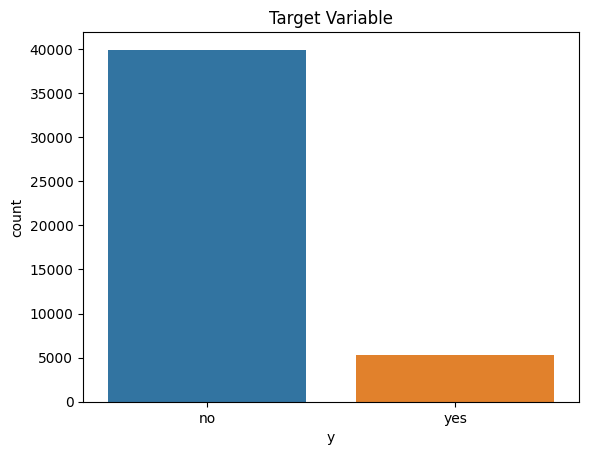

In [11]:
sns.countplot(x = 'y' ,data=df )
plt.title('Target Variable')

In [12]:
print("Percentage of Yes and No")
df["y"].value_counts()/len(df)*100

Percentage of Yes and No


no     88.299967
yes    11.700033
Name: y, dtype: float64

From the above plot and percentage of yes & no, we can say that this dataset is imbalanced and we need to balance this data before training the model

In [13]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


**Univariate analysis of categorical columns**

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


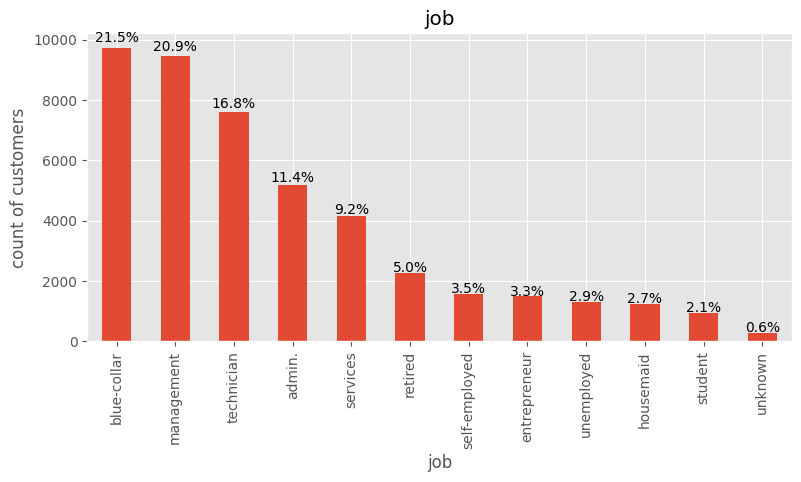

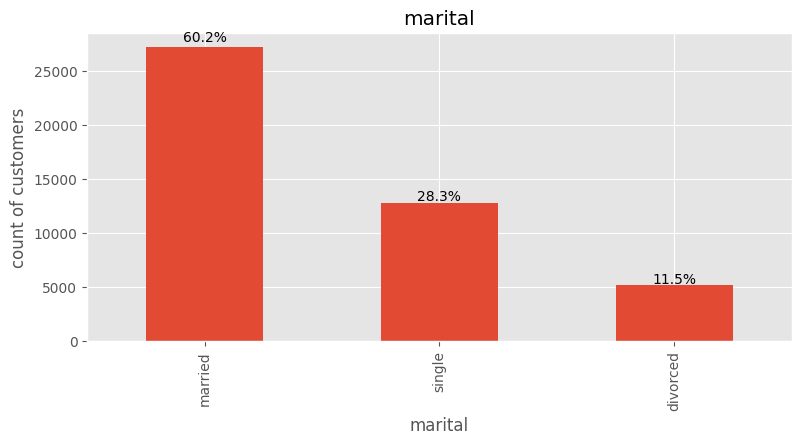

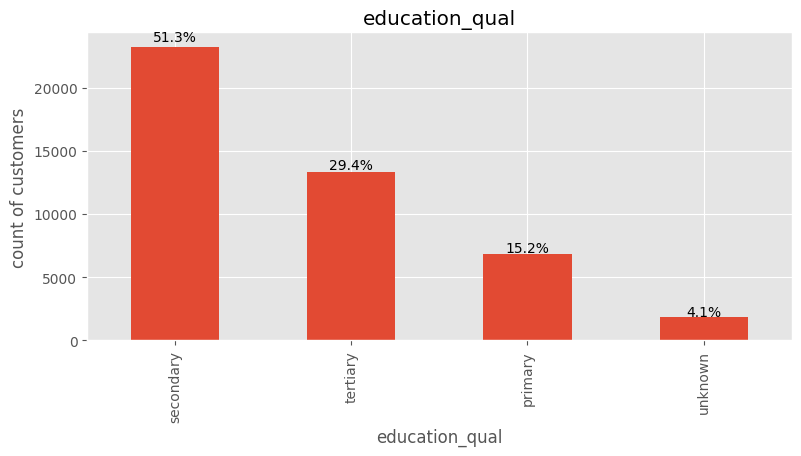

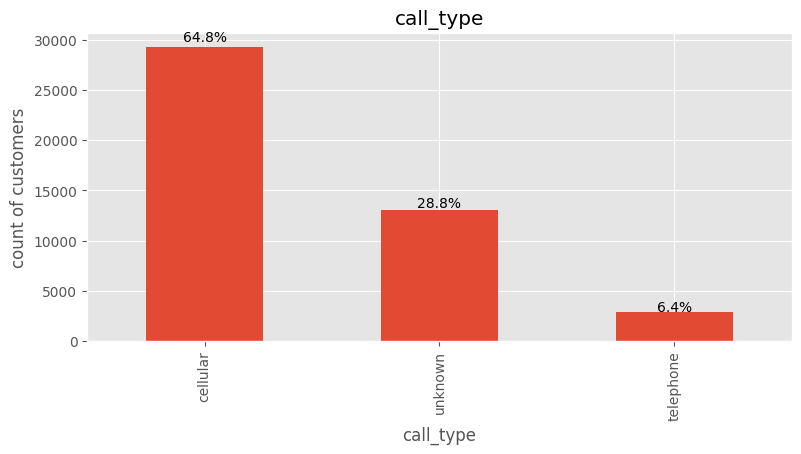

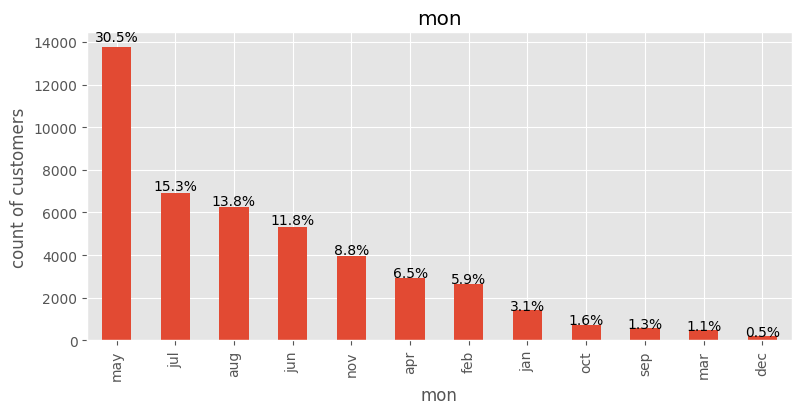

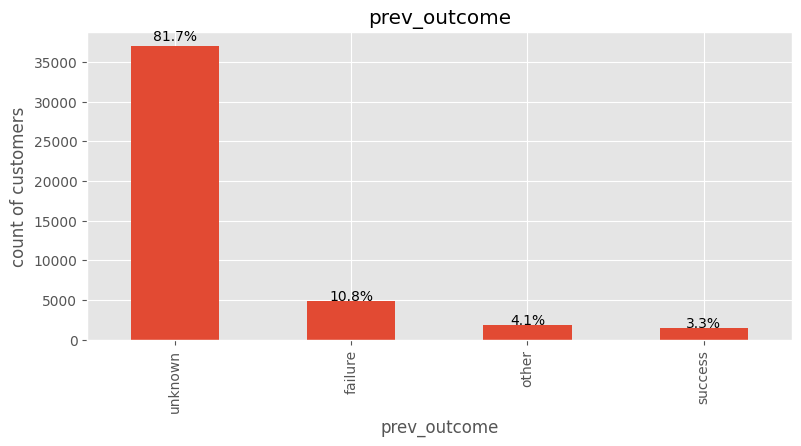

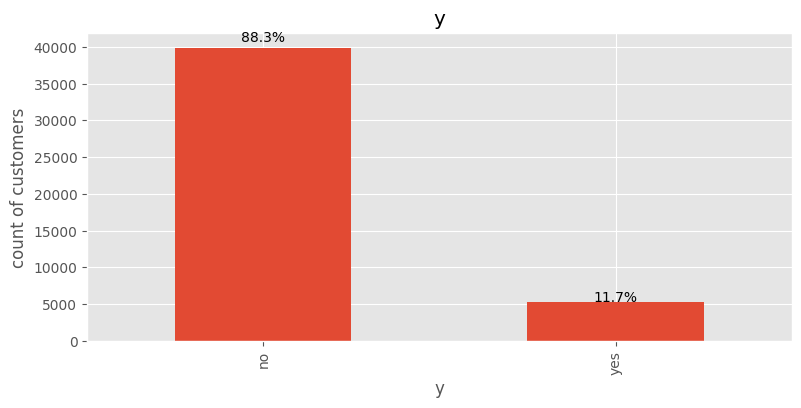

In [14]:
# indentifying the categorical variables
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("count of customers")
    plt.title(column)
    
    # Add percentage labels to the top of each bar
    total = sum([p.get_height() for p in ax.patches])
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/total:.1%}', (x + width/2, y + height*1.02), ha='center')

**Observations :**

The top three professions that our customers belong to are: Management , blue-collar jobs and technicians.

A huge number of the customers are married.

Cellular type is most used by customers.

Many customers have been contacted in the month of May.

Very less number of customers are there who succeessfully converted previously

Most of customers belong to secondary education qualification

The plot for the target variable shows heavy imbalance in the target variable.

The missing values in some columns have been represented as unknown. unknown represents missing data.

**We need to impute the unknown value in job and education_qual column and we need to keep rest because of the percenatge of unknown is high in others.**

In [15]:
cate_var=['job','education_qual']
for column in cate_var:
    mode= df[column].mode()[0]
    df[column]= df[column].replace("unknown", mode)

<ipython-input-15-50201cbe5573>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]= df[column].replace("unknown", mode)
<ipython-input-15-50201cbe5573>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]= df[column].replace("unknown", mode)


**Univariate analysis of Numerical columns**

In [16]:
# indentifying the numerical variables
num_var= df.select_dtypes(include=np.number)
num_var.head()

,age,day,dur,num_calls
0,58,5,261,1
1,44,5,151,1
2,33,5,76,1
3,47,5,92,1
4,33,5,198,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'dur'}>,
        <Axes: title={'center': 'num_calls'}>]], dtype=object)

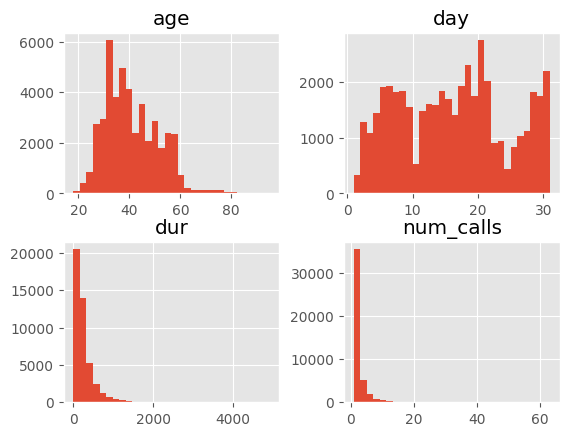

In [17]:
df.hist(bins=30)

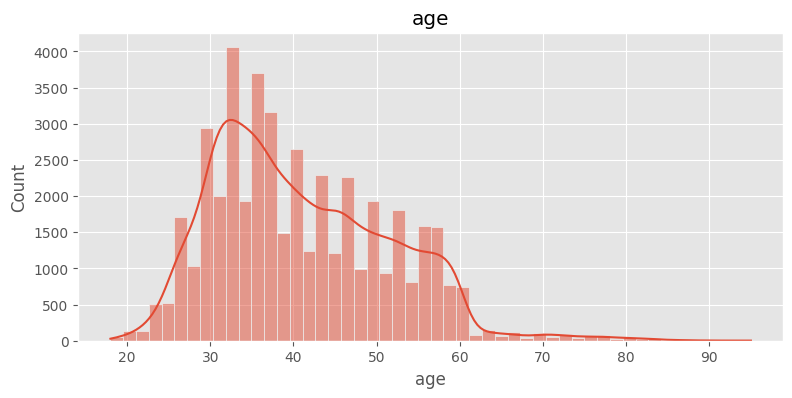

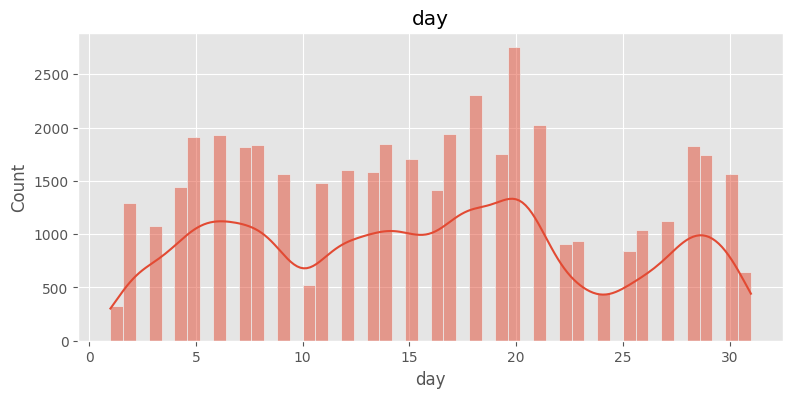

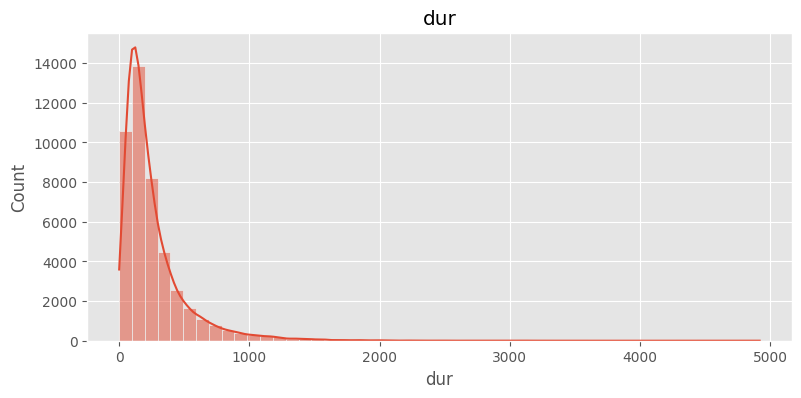

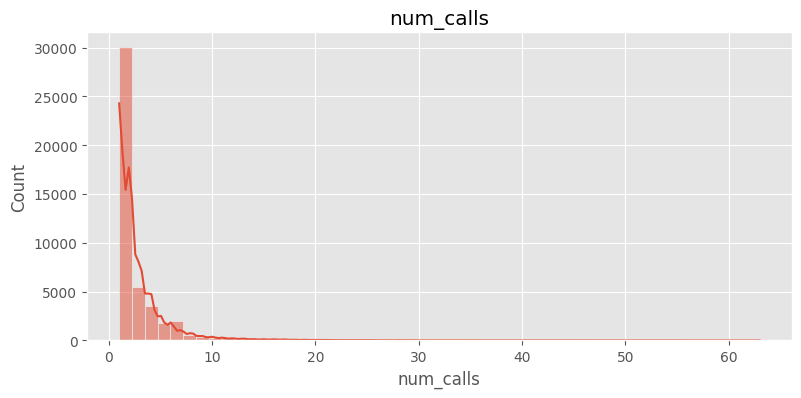

In [18]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in num_var.columns:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    sns.histplot(data=df, x=column,kde=True,bins=50)
    plt.title(column)

**Observation :**

As we can see from the histogram, the features age, dur and num_calls are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features.

Looking at the plot for num_calls, we can infer that majority of the customers were being contacted for the first or second time time.

**Boxplot and outlier analysis**

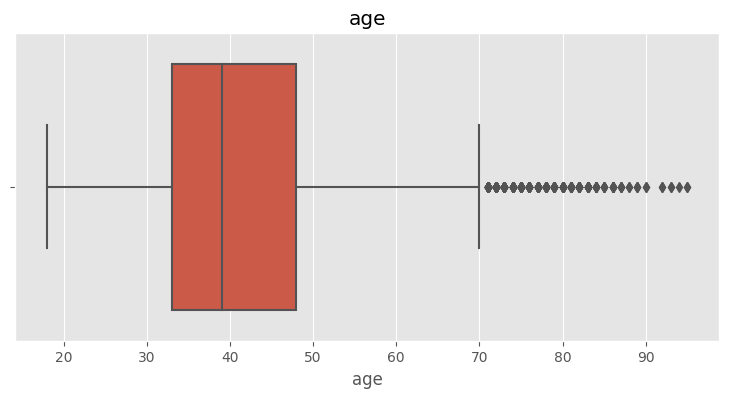

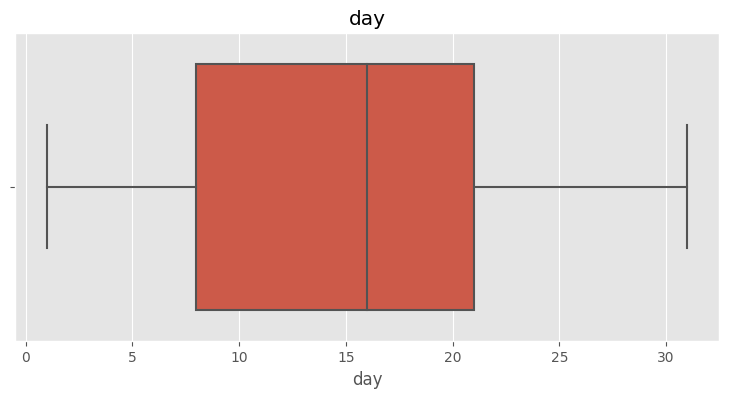

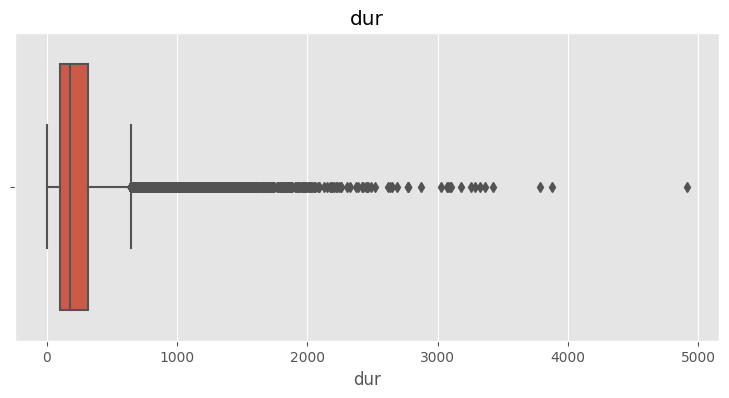

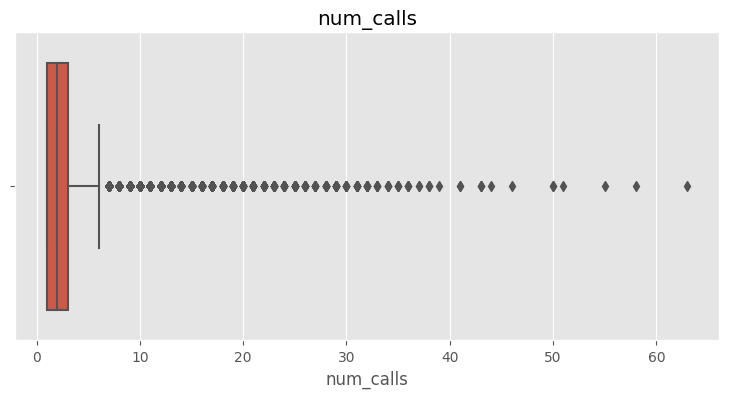

In [19]:
plt.style.use("ggplot")
for column in num_var.columns:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    sns.boxplot(data=df, x=column)
    plt.title(column)

We can see there is many outliers in the upper bound and in the lower bound there is no outliers

**Z-score analysis of outliers**

In [20]:
# Z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['age']))
outlier = np.array(np.where(z > 3))
#a = pd.DataFrame(outlier)
print(outlier.size)

381


Since there is many outliers in the single age column itself its best to choose iqr to impute the outliers

**IQR outlier analysis**

In [21]:
# compute interquantile range to calculate the boundaries
lower_boundries= []
upper_boundries= []
for i in ["age", "dur", "day","num_calls"]:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound= df[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : 10.5 , 70.5
dur : -221.0 , 643.0
day : -11.5 , 40.5
num_calls : -2.0 , 6.0


In [22]:
# replace the all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in ["age", "dur", "day","num_calls"]:
    df.loc[df[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1  

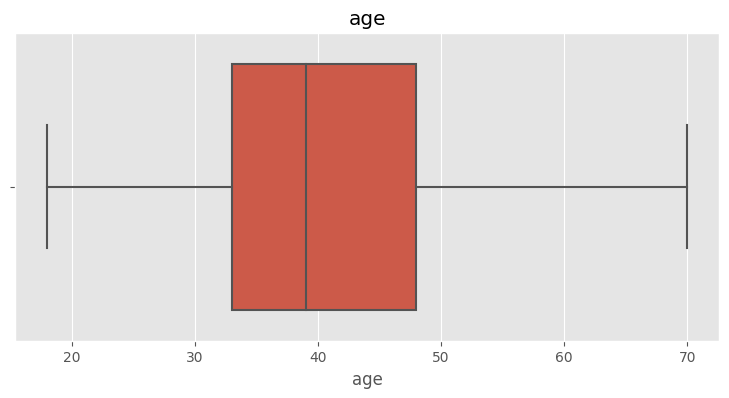

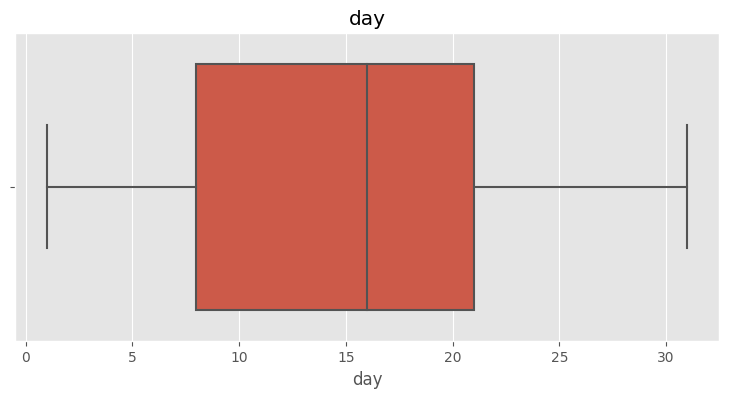

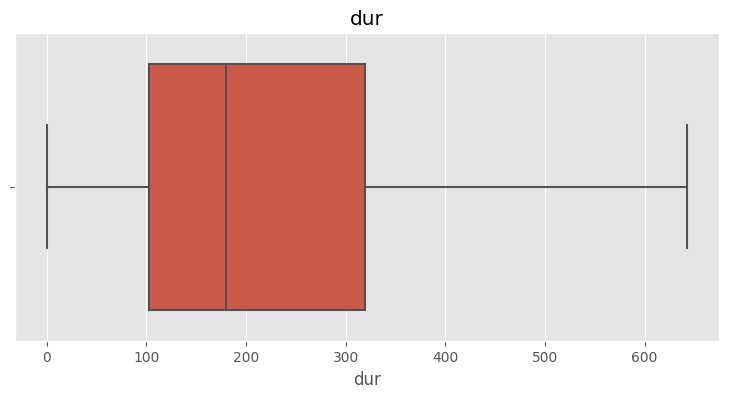

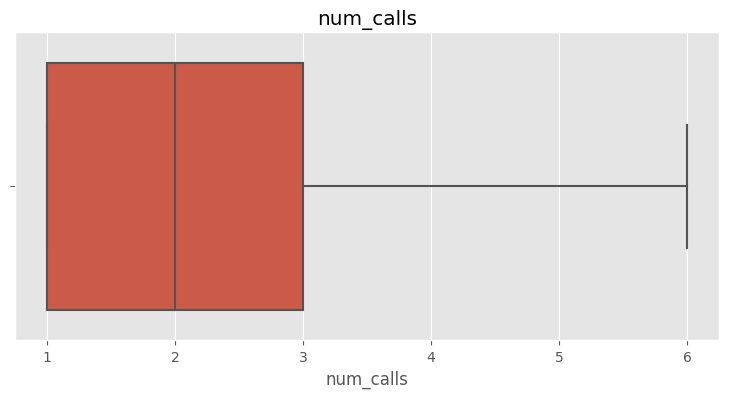

In [23]:
#checking outliers again
plt.style.use("ggplot")
for column in num_var.columns:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    sns.boxplot(data=df, x=column)
    plt.title(column)

Since,
for age the lower boundary (10.5) < minimum value (18) for dur num_calls and day the lower boundaries are negative (-221.0), (-11.0),(-2.0) resp. replacing outliers with the lower boundary is not required

**Bivariate analysis of Categorical columns vs Target variable**

In [24]:
#'y'  target variable
df.replace({'y': {'yes':1,'no':0}},inplace=True)

<ipython-input-24-b2311ca5fe76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'y': {'yes':1,'no':0}},inplace=True)


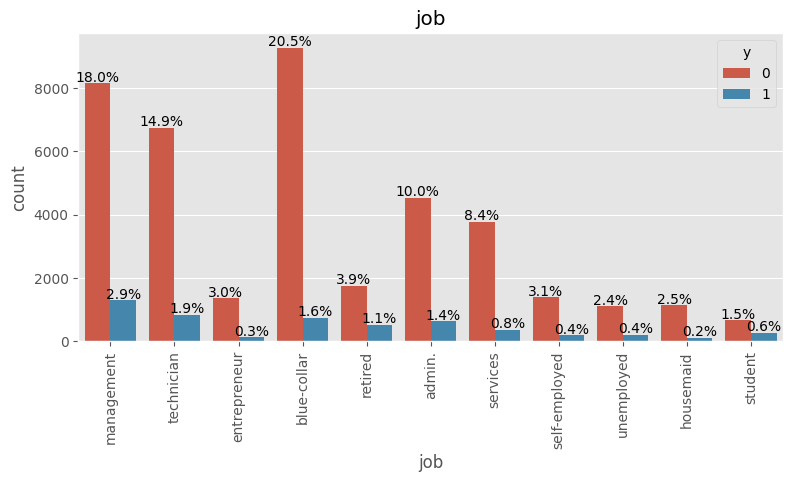

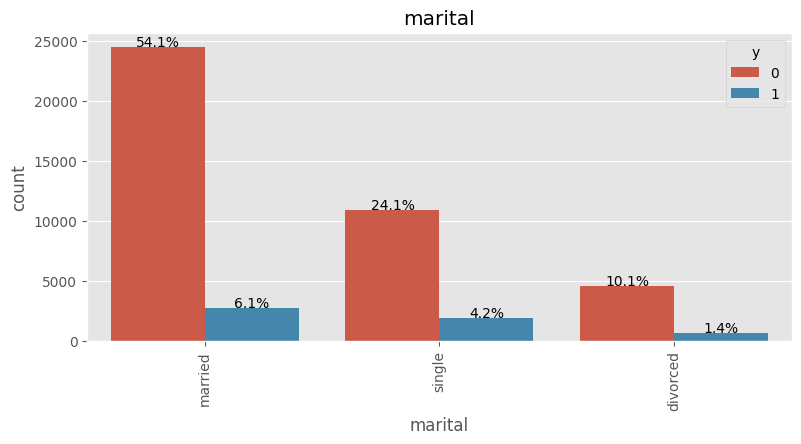

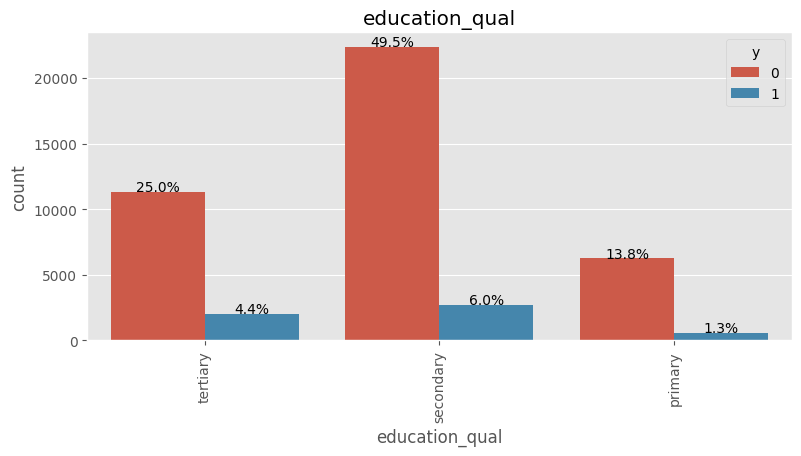

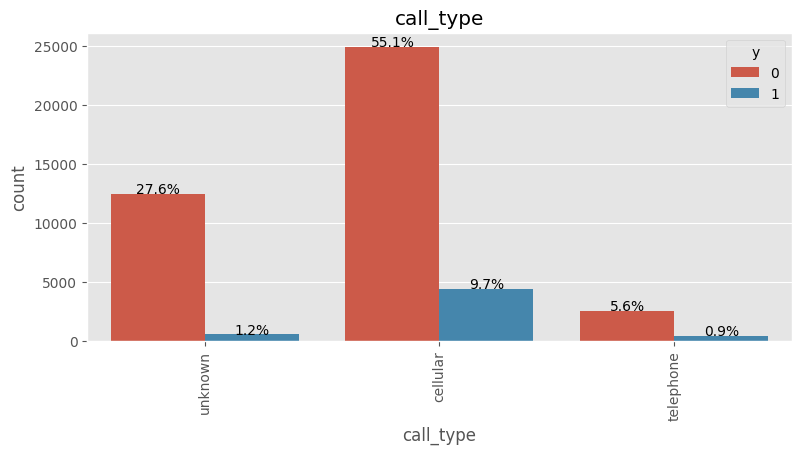

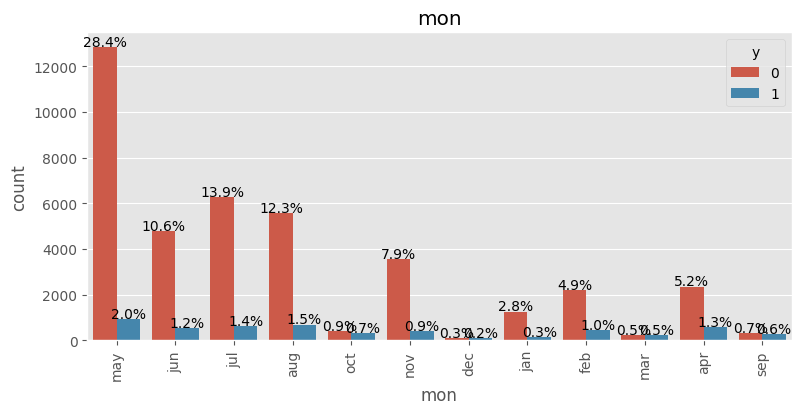

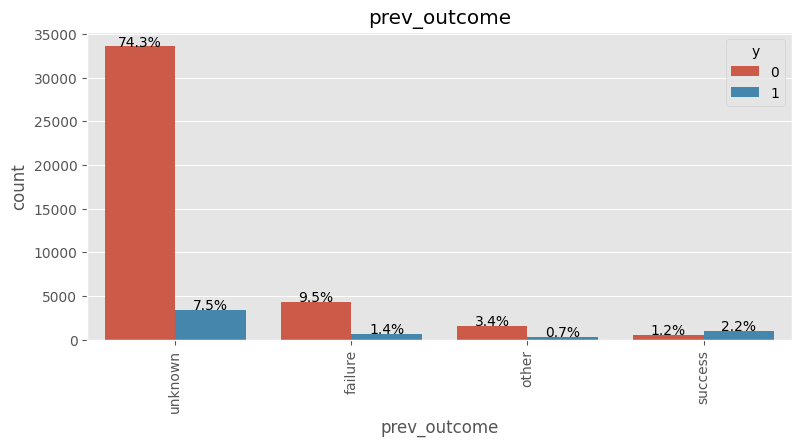

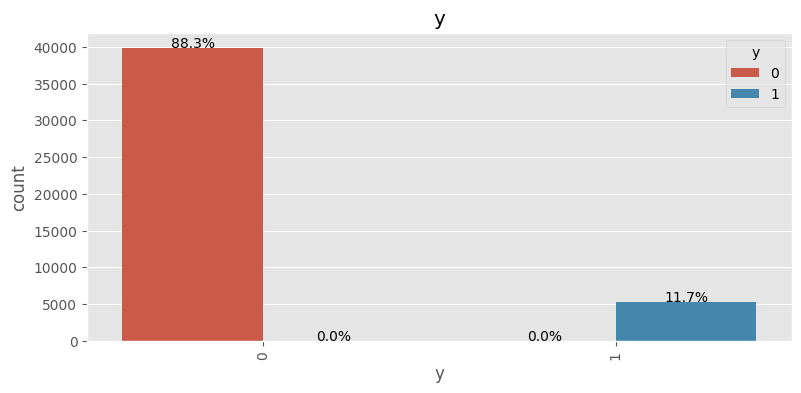

In [25]:
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    sns.countplot(x=column, hue="y", data=df)
    plt.title(column)    
    plt.xticks(rotation=90)
    
    # Add percentage labels to the top of each bar
    for p in ax.patches:
        height = p.get_height()
        total = sum([p.get_height() for p in ax.patches if p.get_x() == p.get_x()])
        ax.text(p.get_x()+p.get_width()/2., height+50, f"{height/total*100:.1f}%", ha="center")
        
    plt.show()

**Observations:**

1.Customers having management jobs form the majority amongst those who have converted most.

2.married most of them converted

3.secondary education qualfied are converted most**

4.Cell-phones should be the preferred mode of contact for contacting customers.

5.may month should be the prefered month to contact

**Correlation analysis of all columns**

<ipython-input-26-0197e9e0d698>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

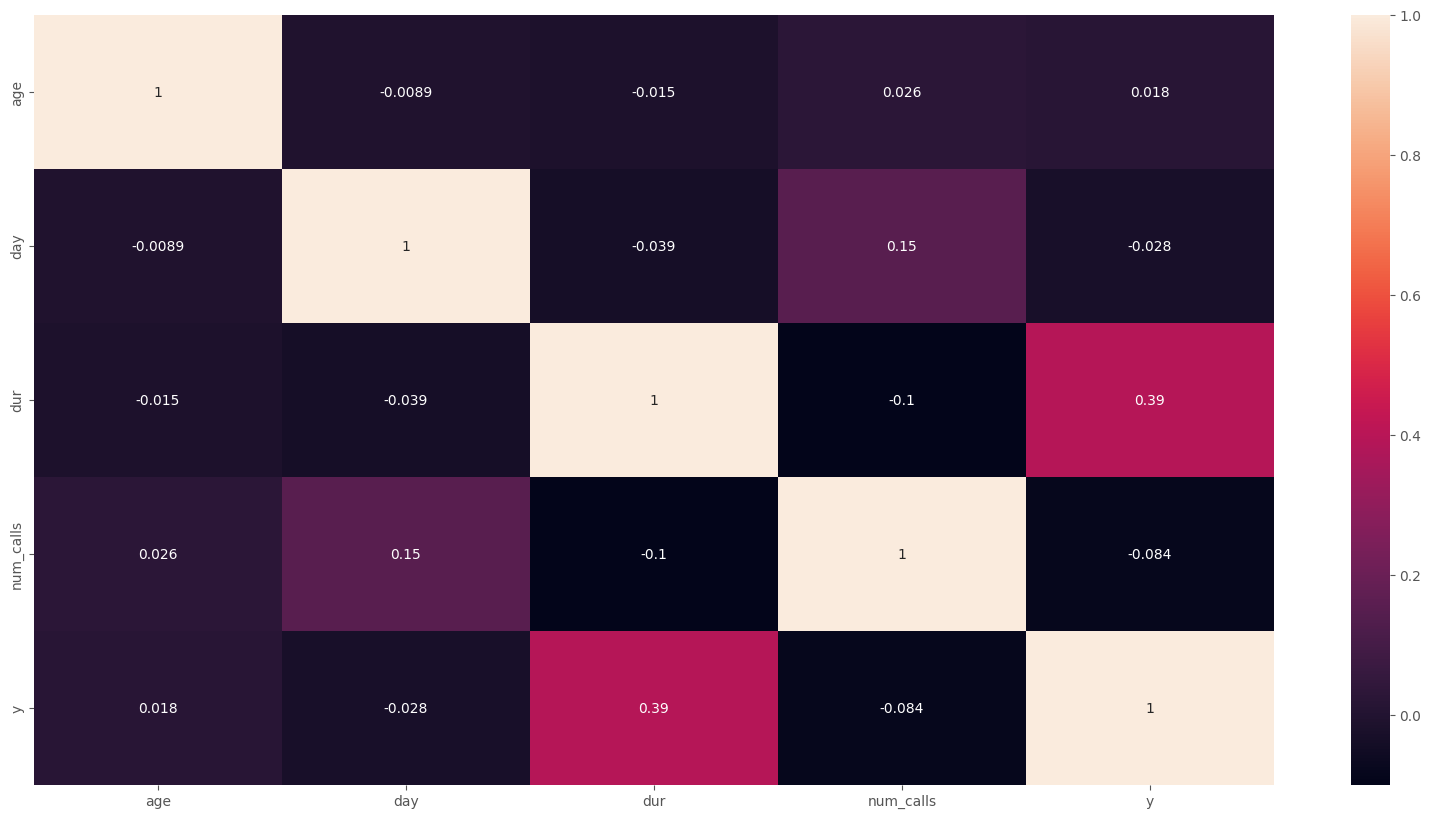

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

There is no features that are highly correlated.So we dont need to remove any columns

**Encoding required columns**

In [27]:
for i in cat_var:
    print(i, ":", df[i].unique())

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital : ['married' 'single' 'divorced']
education_qual : ['tertiary' 'secondary' 'primary']
call_type : ['unknown' 'cellular' 'telephone']
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_outcome : ['unknown' 'failure' 'other' 'success']
y : [0 1]


In [28]:
#Creating function for nominal columns(One hot encoding)
def encoding_data(df,col):
  for i in col:
     df_dummies = pd.get_dummies(df[i], prefix=i)
     df = pd.concat([df, df_dummies], axis=1)
     df.drop([i],inplace=True,axis=1)
  return df

In [29]:
columns=['call_type','prev_outcome','marital','job']
df=encoding_data(df,columns)

In [30]:
#Encoding ordinal column
#'education_qual'
df.replace({'education_qual' : { 'tertiary' : 1, 'secondary' : 2, 'primary' : 3 }},inplace=True)
#Months column
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['mon'] = df['mon'].apply(
    lambda x: months.index(x)+1
)

In [31]:
df.head()

,age,education_qual,day,mon,dur,num_calls,y,call_type_cellular,call_type_telephone,call_type_unknown,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,1,5,5,261,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,44,2,5,5,151,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,33,2,5,5,76,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,47,2,5,5,92,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,33,2,5,5,198,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


##Creating Machine learning models

Spliting dataset

In [32]:
p = df.drop(['y'], axis=1)
q = df['y']

Balancing the target variable using SMOTEENN

In [33]:
# Define the SMOTETomek object with a 0.75 sampling strategy
smote_tomek = SMOTETomek(sampling_strategy='all')

# Apply SMOTETomek oversampling to the training data
X, y = smote_tomek.fit_resample(p, q)

# Check the class distribution of the resampled data
print(y.value_counts())


0    39547
1    39547
Name: y, dtype: int64


Now target variable is balanced and the important point is we should not over or undersample all the data.Only training data should be balanced

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

###Scaling the dataset

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We should train the scaling on only training data set because it will lead to data leakage if we do it in test data

##Models

###1.Logistic Regression

In [36]:
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)
predicted=lr_model.predict(X_test)
conf = confusion_matrix(y_test, predicted)

print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))
log_reg_y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(y_test, log_reg_y_pred_prob)



The accuracy of Logistic Regression is :  92.8243046509846 %
The aurroc_auc_score of Logistic Regression is :  0.9808682467515788


###2.Random Forest

In [37]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
rf_model.fit(X_train, y_train)  
predicted = rf_model.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")
print ("The aurroc_auc_score of  random forest is : ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
dt_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_prob)
dt_auc = roc_auc_score(y_test, dt_y_pred_prob)

The accuracy of Random Forest is :  94.57129721860393 %
The aurroc_auc_score of  random forest is :  0.9897653239981359


###3.XGBOOST

In [38]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, y_train) 
predicted = xgb_model.predict(X_test)

print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Gradient Boosting is : ", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))
xgb_y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_y_pred_prob)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



The accuracy of X Gradient Boosting is :  94.18818481342426 %
The aurroc_auc_score of Gradient Boosting is :  0.9892657059926537


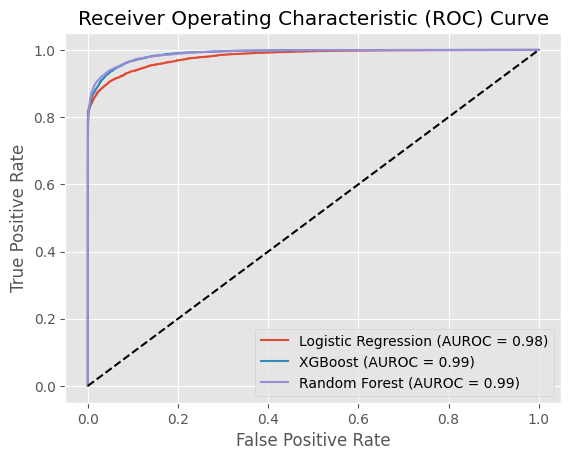

In [39]:
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_y_pred_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_pred_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_prob)

# Plot ROC curves
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUROC = {log_reg_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUROC = {xgb_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Random Forest (AUROC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Among the three models of classification Random Forest performs best and you can see this in the roc plot

In [40]:
importances = rf_model.feature_importances_
df1 = pd.DataFrame({"Features":pd.DataFrame(X_test).columns,"importances":importances})
df1.set_index("importances")

df1 = df1.sort_values('importances')

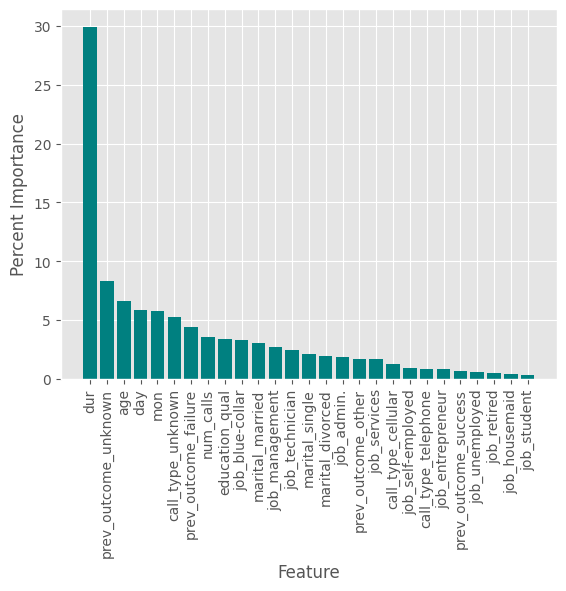

In [41]:
feature_names = list(df.columns)
if 'y' in feature_names:
    feature_names.remove('y')
total_importance = importances.sum()
percent_importances = importances / total_importance * 100

# Create a DataFrame with the feature names and their percent importances
df = pd.DataFrame({'feature_names': feature_names, 'percent_importances': percent_importances})

# Sort the DataFrame by percent importances in descending order
df = df.sort_values(by='percent_importances', ascending=False)

# Create a bar plot of the percent importances
plt.bar(x=df['feature_names'], height=df['percent_importances'], color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percent Importance')
plt.show()

##Conclusion:

Based on the Feature Importance given

The client should focused on the top few features of order given below to have them subscribed to the insurance.

Duration - Longer the call better influncing the clients
Age - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people.
Day - People who subscribed to insurance are mostly mid of the month.
Month - In the month of may people subscribed to insurance are more.
Job - In this blue collar people are targeted more but people who subscribed more are from management job.